In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('./data/bank.csv',)
df.head(2)

In [30]:
# reading data
data = np.load('bank_oversample.npz')
data.files

['arr_0', 'arr_1']

In [5]:
#data.head()

In [31]:
X = data['arr_0']
y = data['arr_1']

In [7]:
X.shape, y.shape

((8000, 42), (8000,))

In [8]:
X[0:10,0:10]

array([[  30, 1787,   19,   79,    1,   -1,    0,    0,    0,    0],
       [  33, 4789,   11,  220,    1,  339,    4,    0,    0,    0],
       [  35, 1350,   16,  185,    1,  330,    1,    0,    0,    0],
       [  30, 1476,    3,  199,    4,   -1,    0,    0,    0,    0],
       [  59,    0,    5,  226,    1,   -1,    0,    1,    0,    0],
       [  35,  747,   23,  141,    2,  176,    3,    0,    0,    0],
       [  36,  307,   14,  341,    1,  330,    2,    0,    0,    0],
       [  39,  147,    6,  151,    2,   -1,    0,    0,    0,    0],
       [  41,  221,   14,   57,    2,   -1,    0,    0,    1,    0],
       [  43,  -88,   17,  313,    1,  147,    2,    0,    0,    0]],
      dtype=int64)

In [9]:
y[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6400, 42), (1600, 42), (6400,), (1600,))

# Bagging & Voting Classifier 

In [12]:
# FA Dataset, Logistic regression. while piece of code has been shared

In [32]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
model_log = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=3)
model_tree = DecisionTreeClassifier(max_depth=10)

In [35]:
vc = VotingClassifier([('logistic',model_log),
                       ('knn',model_knn),
                       ('decision',model_tree)],voting='soft')

In [36]:
vc.fit(x_train,y_train)

C:\Users\kphan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('decision',
                              DecisionTreeClassifier(max_depth=10))],
                 voting='soft')

In [37]:
y_pred  = vc.predict(x_test)
y_pred_prob = vc.predict_proba(x_test)

### Metrics

In [38]:
import innomatics

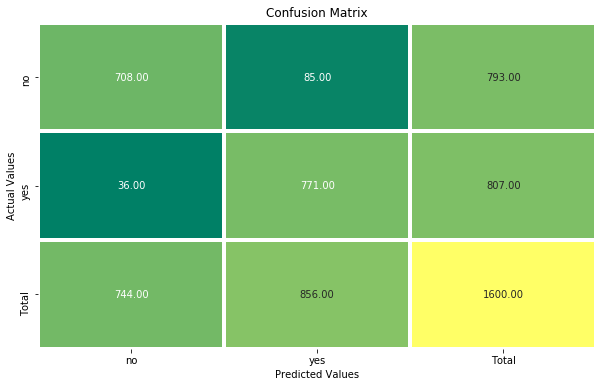

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       793
           1       0.90      0.96      0.93       807

    accuracy                           0.92      1600
   macro avg       0.93      0.92      0.92      1600
weighted avg       0.93      0.92      0.92      1600


************************************Kappa Score************************************


Kappa Score = 0.8486573025978412

******************************Area Under Curve Score******************************


AUC Score = 0.9241012202496752
Number of probabilities to build ROC = 178


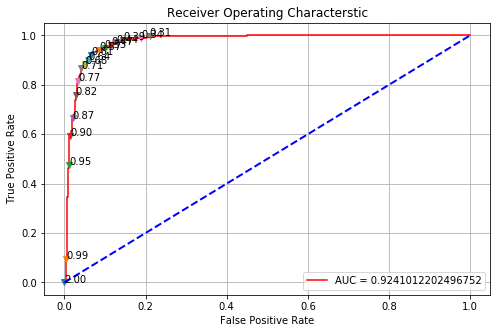

In [39]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob[:,1],
                                 label=['no','yes'],n=10,verbose=True)

In [21]:
#OA
(750+741)/1600



0.931875

In [22]:
# AC
((800/1600)*(809/1600)) + ((800/1600)*(791/1600))

0.5

In [23]:
# Kappa
(0.931 - 0.5)/(1-0.5) 

0.8620000000000001

## Bagging
- Boostraped

In [40]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=10)

In [41]:
bc.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [42]:
y_pred = bc.predict(x_test)

In [43]:
y_pred_prob = bc.predict_proba(x_test)

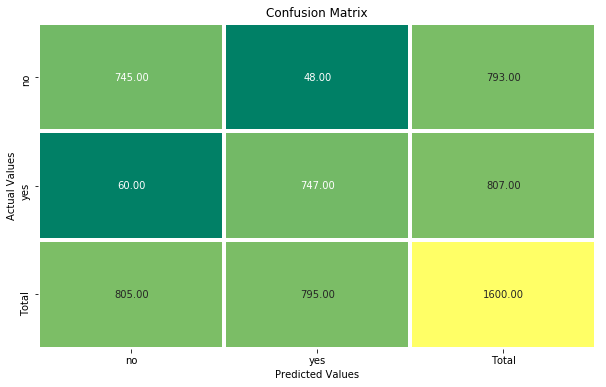

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.93      0.94      0.93       793
           1       0.94      0.93      0.93       807

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600


************************************Kappa Score************************************


Kappa Score = 0.8650073824087745

******************************Area Under Curve Score******************************


AUC Score = 0.9325604616603458
Number of probabilities to build ROC = 11


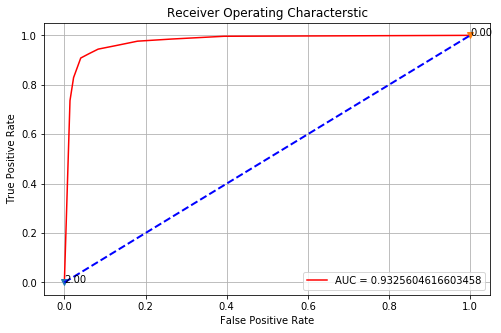

In [44]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob[:,1],label=['no','yes'],n=10,verbose=True)

In [2]:
import numpy as np

In [41]:
from sklearn.model_selection import StratifiedKFold, KFold
>>> import numpy as np
>>> X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))

In [43]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1])

In [39]:
>>> skf = StratifiedKFold(n_splits=3)
>>> for train, test in skf.split(X, y):
...     print('train -  {}   |   test -  {}'.format(
...         np.bincount(y[train]), np.bincount(y[test])))

train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]


In [40]:
kf = KFold(n_splits=3)
>>> for train, test in kf.split(X, y):
...     print('train -  {}   |   test -  {}'.format(
...         np.bincount(y[train]), np.bincount(y[test])))

train -  [28  5]   |   test -  [17]
train -  [28  5]   |   test -  [17]
train -  [34]   |   test -  [11  5]


In [3]:
np.bincount([1,1,1,0,0])

array([2, 3], dtype=int64)